In [111]:
# import-
%run profile
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from math import pi
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
def sologame(csvfile):
    global solo,orgsolo,pubg,result
    global X,y,rg,X_train,y_train,X_test,y_test
    global killhack,wphack,DBNOshack,damagehack,assistshack,boostshack,roadkhack 
    pubg=pd.read_csv(csvfile)
    solo = pubg[pubg['matchType'].isin(['solo','solo-fpp'])]
    orgsolo=solo.copy()
    solo=solo[solo['winPlacePerc']>=0]
    
    # 걷지 않고 무기를 사용하는 이상치 삭제
    walk0 = solo[solo.walkDistance==0]
    wphack=walk0[walk0.weaponsAcquired>0]
    
    # 걷지 않고 킬 하는 이상치 삭제
    killhack= walk0[walk0.kills>0]
    
    # 걷지않고 도핑하는 이상치 삭제
    boostshack = walk0[walk0.boosts>0]
    
    # 걷지않고 데미지 입히는 이상치 삭제
    damagehack = walk0[walk0.damageDealt>0]
    
    # 걷지않고 어시스트 이상치 삭제
    assistshack = walk0[walk0.assists>0]
    
    # 기절시키는 이상치 삭제 (솔로는 즉사)
    DBNOshack = solo[solo.DBNOs>0]
    
    # 소생시키는 이상치 삭제 (솔로는 소생이 없음)
    reviveshack = solo[solo.revives>0]
    
    # 팀킬 이상치 삭제 (솔로는 팀이 존재하지않음)
    teamkhack = solo[solo.teamKills>0]
    
    # 차를 탑승하지 않고 로드킬하는 이상치 삭제
    ride0 = solo[solo.rideDistance==0]
    roadkhack = ride0[ride0.roadKills>0]
    
    result1=pd.merge(wphack,killhack,how='outer')
    result2=pd.merge(result1,boostshack,how='outer')
    result3=pd.merge(result2,damagehack,how='outer')
    result4=pd.merge(result3,assistshack,how='outer')
    result5=pd.merge(result4,DBNOshack,how='outer')
    result6=pd.merge(result5,reviveshack,how='outer')
    result7=pd.merge(result6,teamkhack,how='outer')
    result=pd.merge(result7,roadkhack,how='outer')
    
    solo=solo.drop(solo[solo.Id.isin(result.Id)].index)
#     solo=solo.drop(['revives','DBNOs','teamKills','groupId','matchType',
#                     'matchId'],axis=1).set_index('Id')
    solo=solo[['Id','walkDistance','weaponsAcquired','heals','matchDuration','boosts','killPlace','winPlacePerc']].set_index('Id')
    
    print("총 {}명의 사용자 중 핵사용 의심 플레이어는 {}명 이며 전체의 {:.3f}%입니다\n"
         .format(len(orgsolo),len(result),len(solo)/len(orgsolo)*100))
    print("이상 인원을 제외 {}명이 플레이하였습니다\n".format(len(solo)))
    
    print("이상치 자료명은 'result'이며 정상 자료명은 'solo'입니다\n")
    
    print("핵 사용 의심 플레이어 & 오류\n")
    print("이동 없이 무기소지 명단 : wphack ({}명)".format(len(wphack)))
    print("이동 없이 킬이 있는 명단 : killhack ({}명)".format(len(killhack)))
    print("이동 없이 아이템사용 명단 : boostshack ({}명)".format(len(boostshack)))
    print("이동 없이 데미지를 입힌 명단 : damagehack ({}명)".format(len(damagehack)))
    print("이동 없이 어시스트를 한 명단 : assistshack ({}명)".format(len(assistshack)))
    print("상대를 기절시킨 명단 (solo모드불가) : DBNOshack ({}명)".format(len(DBNOshack)))
    print("팀원을 소생한 명단 (solo모드불가) : reviveshack ({}명)".format(len(reviveshack)))
    print("팀킬을 한 명단 (solo모드불가) : teamkhack ({}명)".format(len(teamkhack)))
    print("차량 탑승 없이 로드킬이 있는 명단 : roadkhack ({}명)\n".format(len(roadkhack)))
    
    print("중복인원 : {}명\n".format(len(wphack)+len(killhack)+len(reviveshack)+
                              len(boostshack)+len(damagehack)+len(assistshack)+
                              len(DBNOshack)+len(roadkhack)+len(teamkhack)-
                                len(result)))
    
    X=solo.drop(['winPlacePerc'],axis=1)
    y=solo.winPlacePerc

    # RandomForestRegressor fitting & print score
#     rg = RandomForestRegressor()
    rg = RandomForestRegressor(min_samples_leaf=1,n_estimators=100)
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    rg.fit(X_train,y_train)
    print("train data 예측률 : {:.3f}%".format(rg.score(X_train,y_train)*100))
    print("test data 예측률 : {:.3f}%".format(rg.score(X_test,y_test)*100))
    

In [3]:
sologame("train_V2.csv")

총 718705명의 사용자 중 핵사용 의심 플레이어는 21075명 이며 전체의 97.068%입니다

이상 인원을 제외 697629명이 플레이하였습니다

이상치 자료명은 'result'이며 정상 자료명은 'solo'입니다

핵 사용 의심 플레이어 & 오류

이동 없이 무기소지 명단 : wphack (11996명)
이동 없이 킬이 있는 명단 : killhack (172명)
이동 없이 아이템사용 명단 : boostshack (279명)
이동 없이 데미지를 입힌 명단 : damagehack (5963명)
이동 없이 어시스트를 한 명단 : assistshack (220명)
상대를 기절시킨 명단 (solo모드불가) : DBNOshack (0명)
팀원을 소생한 명단 (solo모드불가) : reviveshack (0명)
팀킬을 한 명단 (solo모드불가) : teamkhack (8194명)
차량 탑승 없이 로드킬이 있는 명단 : roadkhack (0명)

중복인원 : 5749명

train data 예측률 : 99.065%
test data 예측률 : 93.418%


In [8]:
# feature_importances_ values chart

f_importances=DataFrame(rg.feature_importances_)
f_importances.index=list(X_train.columns)
f_importances.sort_values(by=0,ascending=False)

,0
walkDistance,0.524932
killPlace,0.253369
weaponsAcquired,0.075384
boosts,0.061120
matchDuration,0.016296
heals,0.012035
numGroups,0.010461
longestKill,0.009499
maxPlace,0.006560
kills,0.006412


In [123]:
# Radar Plot data
r_solo = pubg[['Id','headshotKills','kills','walkDistance','longestKill','heals','boosts','winPlacePerc']]
r_solo = r_solo.set_index('Id')
r_solo = r_solo.reset_index().drop(['Id'],axis=1)
r_solo['medics']=r_solo['heals']+r_solo['boosts']
r_solo=r_solo.drop(['heals','boosts'],axis=1)

# data fixed
r_solo['medics']=r_solo['medics']/r_solo['medics'].max()*10
r_solo['longestKill']=r_solo['longestKill']/r_solo['longestKill'].max()*11
r_solo['headshotKills']=r_solo['headshotKills']/r_solo['kills']*3
r_solo['kills']=r_solo['kills']/r_solo['kills'].max()*20
r_solo['walkDistance']=r_solo['walkDistance']/15370.0*4


In [81]:
r_solo.mean()

headshotKills    0.239182
kills            0.012844
walkDistance     0.075096
longestKill      0.021022
winPlacePerc     0.472822
medics           0.030581
dtype: float64

In [134]:
# top 10%
r_solo_top=r_solo[r_solo.winPlacePerc>0.9]
r_solo_top10=r_solo_top.mean()
t10=DataFrame(r_solo_top10.drop(['winPlacePerc'])).T*100

# top 10% ~ 30%
r_solo_low=r_solo[r_solo.winPlacePerc>0.7]
r_solo_low10=r_solo_low[r_solo_low.winPlacePerc<0.9].mean()
l10=DataFrame(r_solo_low10.drop(['winPlacePerc'])).T*100

# make group & merge
t10['group']='top10'
l10['group']='top30'
df=pd.merge(t10,l10,how='outer')
df=df.iloc[:,[5,0,1,2,3,4]]

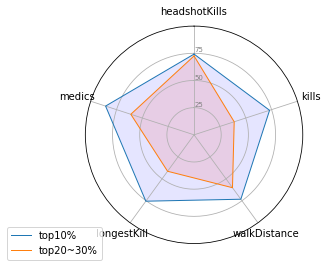

In [139]:
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="top10%")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="top20~30%")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))